In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

In [ ]:
IMAGE_SIZE = [128, 128]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_path = 'drive/MyDrive/spot'
valid_path = 'drive/MyDrive/spot'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 16,
                                                 class_mode = 'binary',subset='training')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (128, 128),
                                            batch_size = 16,
                                            class_mode = 'binary',subset='validation')

Found 2454 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [ ]:
model_details=model.fit(training_set,batch_size=16, epochs = 25, validation_data=test_set, verbose = 2,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/25
154/154 - 116s - loss: 0.4106 - accuracy: 0.8089 - val_loss: 0.3454 - val_accuracy: 0.8286 - 116s/epoch - 752ms/step
Epoch 2/25
154/154 - 102s - loss: 0.3112 - accuracy: 0.8647 - val_loss: 0.3085 - val_accuracy: 0.8694 - 102s/epoch - 663ms/step
Epoch 3/25
154/154 - 105s - loss: 0.2806 - accuracy: 0.8835 - val_loss: 0.3318 - val_accuracy: 0.8571 - 105s/epoch - 679ms/step
Epoch 4/25
154/154 - 106s - loss: 0.2597 - accuracy: 0.8875 - val_loss: 0.2705 - val_accuracy: 0.8694 - 106s/epoch - 689ms/step
Epoch 5/25
154/154 - 103s - loss: 0.2512 - accuracy: 0.8973 - val_loss: 0.2421 - val_accuracy: 0.8959 - 103s/epoch - 668ms/step
Epoch 6/25
154/154 - 102s - loss: 0.2354 - accuracy: 0.9059 - val_loss: 0.2196 - val_accuracy: 0.9061 - 102s/epoch - 660ms/step
Epoch 7/25
154/154 - 107s - loss: 0.2221 - accuracy: 0.9083 - val_loss: 0.2200 - val_accuracy: 0.9061 - 107s/epoch - 698ms/step
Epoch 8/25
154/154 - 102s - loss: 0.2203 - accuracy: 0.9132 - val_loss: 0.2351 - val_accuracy: 0.9102 - 

In [ ]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [ ]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

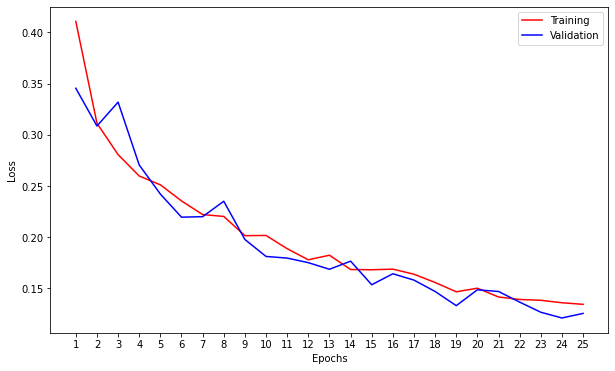

In [ ]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

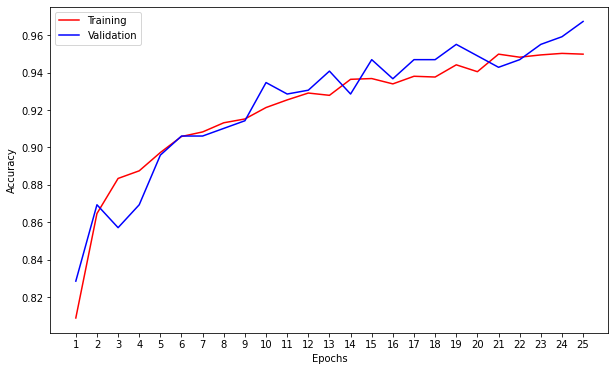

In [ ]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
open("vgg16_dump.tflite", 'wb').write(tflite_model)

58900372